In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

# 1. tensorflow v.2.xx에서 v1사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2를 비활성화하고 v1활성화
import numpy as np
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term


## Tensorflow
- 데이터 흐름 그래프(tensor객체의 흐름)
- 이 그래프는 node(상수, 변수, 연산)와 edge로 구성
- sess = tf.Session()으로 실행
- sess.run()을 통해 값을 확인

In [3]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))

b'Hello, Tensorflow'


In [4]:
# 간단한 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [5]:
# 타입 변경
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [6]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3.])
tensor = tf.reduce_mean(data)
sess = tf.Session()
sess.run(tensor)

2.0

In [7]:
# 랜덤값을 갖는 tensor
a = tf.random_normal([1]) # 평균0, 표준편차가 1인 난수 실수 2개(정규분포이루는 난수)
b = tf.random_normal([1])
sess = tf.Session()
sess.run([a,b])

[array([1.2421035], dtype=float32), array([1.0867627], dtype=float32)]

In [8]:
w = tf.Variable(tf.random.normal([1]))
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # w변수의 난수 초기화
sess.run(w)

array([-1.1711673], dtype=float32)

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 입력(독립)변수 x가 1개, 타겟변수 y가 1개

In [9]:
x = np.array([1,2,3])
y = np.array([2,3,4])
# weight와 bias(처음엔 랜덤값으로 셋팅, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 예측값
H = W*x + b
# cost function(손실함수 = mse;최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습목적 : cost가 최소가 되는 w,b를 찾아내는 것
cost는 2차 함수이므로 곡선그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강)
=> GradientDescentOptimizer
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
# Session 생성
sess = tf.Session()
# w, b 변수 노드에 초기화
sess.run(tf.global_variables_initializer())
# 5000번 학습 (v2에서는 fit함수)
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step,
                                               cost_val,
                                               W_val,
                                               b_val))

0번째 cost:27.61713218688965, W:[-0.22573808], b:[-1.1179752]
200번째 cost:0.0963129922747612, W:[1.359578], b:[0.18259457]
400번째 cost:0.036777012050151825, W:[1.2221974], b:[0.4948931]
600번째 cost:0.014043229632079601, W:[1.1373043], b:[0.6878749]
800번째 cost:0.005362400785088539, W:[1.0848459], b:[0.8071256]
1000번째 cost:0.002047623274847865, W:[1.0524296], b:[0.8808153]
1200번째 cost:0.0007818939629942179, W:[1.0323985], b:[0.9263507]
1400번째 cost:0.00029856545734219253, W:[1.0200201], b:[0.9544891]
1600번째 cost:0.00011400579387554899, W:[1.0123713], b:[0.9718772]
1800번째 cost:4.3531545088626444e-05, W:[1.0076445], b:[0.98262215]
2000번째 cost:1.6622756447759457e-05, W:[1.0047239], b:[0.9892614]
2200번째 cost:6.347152520902455e-06, W:[1.0029191], b:[0.99336433]
2400번째 cost:2.4242519884865033e-06, W:[1.001804], b:[0.99589914]
2600번째 cost:9.261227091883484e-07, W:[1.001115], b:[0.99746525]
2800번째 cost:3.5417806998339074e-07, W:[1.0006897], b:[0.9984326]
3000번째 cost:1.3553254518683389e-07, W:[1.000426

In [10]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000087], dtype=float32), array([0.9999811], dtype=float32)]

In [11]:
W_, b_ = sess.run([W, b])
W_[0], b_[0]

(1.0000087, 0.9999811)

In [12]:
def predict(x):
    return W_[0]*x + b_[0]

In [13]:
input_x = int(input('입력값은 ?'))
print('예측값은', predict(input_x))

입력값은 ?1
예측값은 1.9999898076057434


## 2.2 predict를 위한 placeholder이용
- placeholder : 텐서플로우 외부에서 데이터를 입력받는 노드

In [14]:
# x = np.array([1,2,3])
x = tf.placeholder(tf.float16)
H = 1*x + 1
sess = tf.Session()
sess.run(H, feed_dict={x:5})
sess.run(H, feed_dict={x:np.array([1,2,3])})

array([2., 3., 4.], dtype=float16)

In [15]:
# H = 2x+1
x_data = np.array([1,2,3,5,8])
y_data = np.array([3,5,7,11,17])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 5000번 학습
for step in range(5001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:61.42265701293945, W:[1.2235912], b:[-0.13511339]
200째 : cost:0.027228590101003647, W:[2.0561163], b:[0.7000595]
400째 : cost:0.0026781794149428606, W:[2.0175993], b:[0.90593225]
600째 : cost:0.0002634146367199719, W:[2.0055194], b:[0.9704987]
800째 : cost:2.5908204406732693e-05, W:[2.001731], b:[0.9907478]
1000째 : cost:2.549900500525837e-06, W:[2.000543], b:[0.99709785]
1200째 : cost:2.5080885279749054e-07, W:[2.0001705], b:[0.99908984]
1400째 : cost:2.4608244331147944e-08, W:[2.0000534], b:[0.99971443]
1600째 : cost:2.443596214263266e-09, W:[2.0000167], b:[0.99991035]
1800째 : cost:2.575347990418919e-10, W:[2.0000055], b:[0.9999711]
2000째 : cost:3.715285717964534e-11, W:[2.0000021], b:[0.99998915]
2200째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2400째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2600째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
2800째 : cost:2.060005464821213e-11, W:[2.0000017], b:[0.99999213]
3000째 : cost:2.060005464

In [16]:
# 예측하기
sess.run(H, feed_dict={x:5})

array([11.000001], dtype=float32)

In [17]:
sess.run(H, feed_dict={x:np.array([5, 6, 7])})

array([11.000001, 13.000002, 15.000004], dtype=float32)

## 2.3 scale이 다른 데이터의 linear regression 구현(scale조정X)

In [18]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 3000번 학습
for step in range(3001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:x_data,
                                                   y:y_data})
    if step%200 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:4375.00390625, W:[7.8320026], b:[0.5723348]
200째 : cost:83.6234359741211, W:[10.211115], b:[-0.6958747]
400째 : cost:83.49528503417969, W:[10.274975], b:[-1.1687055]
600째 : cost:83.4835205078125, W:[10.294317], b:[-1.3119224]
800째 : cost:83.48241424560547, W:[10.300175], b:[-1.3553011]
1000째 : cost:83.4823226928711, W:[10.30195], b:[-1.3684406]
1200째 : cost:83.48231506347656, W:[10.302487], b:[-1.37242]
1400째 : cost:83.4822998046875, W:[10.30265], b:[-1.3736261]
1600째 : cost:83.4822998046875, W:[10.3027], b:[-1.3739904]
1800째 : cost:83.48231506347656, W:[10.302714], b:[-1.3741004]
2000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741324]
2200째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2400째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2600째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
2800째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]
3000째 : cost:83.48233032226562, W:[10.302718], b:[-1.3741326]


In [19]:
# cost값이 멈춤 : local 최소값

## 2.4 scale이 다른 데이터의 linear regression을 구현(scale 조정 O)
### scale을 맞추기 : 모든 데이터를 일정 범위내로 조정
- normalization(정규화)
                     X - Xmin
    normalization = ------------
                     Xmax - Xmin
        * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler이용)
        
- standardization(표준화)
                        X - Xmean(평균)
    standardization = -------------------
                          Xstd(표준편차)
        * 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.StandardScaler이용)                      

In [20]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1,2,5,8,10])
y_data = np.array([3,15,68,80,95])
scaled_x_data = (x_data - x_data.min() ) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min() ) / (y_data.max() - y_data.min())
print(scaled_x_data)
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.13043478 0.70652174 0.83695652 1.        ]


In [21]:
# 라이브러리를 쓰고 정규화 (MinMaxScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1, 1)
# np.column_stack([x_data, y_data])
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 정규화시킬 객체
# scaled_x.fit(x_data)
# scaled_x_data = scaler_x.transform(x_data)
scaled_x_data = scaler_x.fit_transform(x_data)
scaled_y = MinMaxScaler() # y_data를 정규화시킬 객체
scaled_y_data = scaled_y.fit_transform(y_data)
np.column_stack([x_data, y_data, scaled_x_data, scaled_y_data])

array([[ 1.        ,  3.        ,  0.        ,  0.        ],
       [ 2.        , 15.        ,  0.11111111,  0.13043478],
       [ 5.        , 68.        ,  0.44444444,  0.70652174],
       [ 8.        , 80.        ,  0.77777778,  0.83695652],
       [10.        , 95.        ,  1.        ,  1.        ]])

In [22]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:0.029606666415929794, W:[1.2086785], b:[0.08822954]
600째 : cost:0.013130292296409607, W:[1.1478453], b:[0.01955148]
1200째 : cost:0.011750214733183384, W:[1.1218395], b:[0.01074163]
1800째 : cost:0.011260809376835823, W:[1.1052396], b:[0.0144669]
2400째 : cost:0.01091848686337471, W:[1.0921503], b:[0.02025267]
3000째 : cost:0.010661040432751179, W:[1.0810692], b:[0.02585328]
3600째 : cost:0.010466450825333595, W:[1.0715011], b:[0.03085055]
4200째 : cost:0.010319337248802185, W:[1.0631969], b:[0.03522437]
4800째 : cost:0.01020809169858694, W:[1.0559789], b:[0.03903401]
5400째 : cost:0.010123984888195992, W:[1.0497032], b:[0.04234804]
6000째 : cost:0.010060390457510948, W:[1.0442468], b:[0.04523007]
6600째 : cost:0.010012299753725529, W:[1.0395019], b:[0.04773616]
7200째 : cost:0.009975944645702839, W:[1.0353762], b:[0.04991531]
7800째 : cost:0.009948451071977615, W:[1.0317887], b:[0.05181015]
8400째 : cost:0.009927665814757347, W:[1.0286689], b:[0.05345781]
9000째 : cost:0.00991194974631071

In [23]:
# 예측 : 모델에 scale 조정된 값으로 예측=>scale 조정된 y값
scaled_input = scaler_x.transform(np.array([[2],
                                            [3]]))
print('모델 예측을 위한 입력:', scaled_input, sep='\n')
scaled_output = sess.run(H, feed_dict={x:scaled_input})
print('모델 예측 결과 :', scaled_output, sep='\n')
print('결과 :', scaled_y.inverse_transform(scaled_output), sep='\n')

모델 예측을 위한 입력:
[[0.11111111]
 [0.22222222]]
모델 예측 결과 :
[[0.17267728]
 [0.2856622 ]]
결과 :
[[18.88631 ]
 [29.280922]]


In [24]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaled_y.inverse_transform(scaled_y_hat)

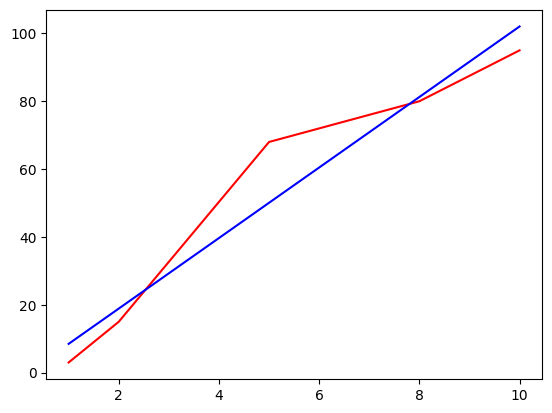

In [25]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

In [26]:
# 라이브러리를 사용하여 표준화(StandardScaler이용)
x_data = np.array([1,2,5,8,10]).reshape(-1, 1)
y_data = np.array([3,15,68,80,95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaled_y = StandardScaler() # y_data를 표준화할 객체
scaler_x_data = scaler_x.fit_transform(x_data)
scaled_y_data = scaled_y.fit_transform(y_data)
print(np.column_stack([x_data, y_data]))
print(np.column_stack([scaled_x_data, scaled_y_data]))

[[ 1  3]
 [ 2 15]
 [ 5 68]
 [ 8 80]
 [10 95]]
[[ 0.         -1.34819316]
 [ 0.11111111 -1.01936556]
 [ 0.44444444  0.43295634]
 [ 0.77777778  0.76178394]
 [ 1.          1.17281844]]


In [27]:
# placeholder 설정 (입력변수 x, 타겟변수 y)
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# W, b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis(예측값)
H = W*x + b
# 손실함수
cost = tf.reduce_mean(tf.square(H-y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)
# Session 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer()) # W, b 초기화
# 12000번 학습
for step in range(12001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                         feed_dict={x:scaled_x_data,
                                                   y:scaled_y_data})
    if step%600 == 0:
        print('{}째 : cost:{}, W:{}, b:{}'.format(step, cost_val, W_val, b_val))

0째 : cost:2.3294482231140137, W:[0.8044316], b:[-1.7239487]
600째 : cost:0.31173309683799744, W:[1.4191622], b:[-0.91876864]
1200째 : cost:0.17771753668785095, W:[1.6523175], b:[-0.7892172]
1800째 : cost:0.1459963619709015, W:[1.787654], b:[-0.8041821]
2400째 : cost:0.1254941076040268, W:[1.8902577], b:[-0.84573615]
3000째 : cost:0.11016638576984406, W:[1.9761046], b:[-0.8882522]
3600째 : cost:0.09858562797307968, W:[2.0499988], b:[-0.92664963]
4200째 : cost:0.08982987701892853, W:[2.1140835], b:[-0.9603571]
4800째 : cost:0.08320963382720947, W:[2.1697702], b:[-0.9897386]
5400째 : cost:0.0782039612531662, W:[2.2181842], b:[-1.0153031]
6000째 : cost:0.07441917806863785, W:[2.2602801], b:[-1.037536]
6600째 : cost:0.0715574398636818, W:[2.2968845], b:[-1.0568694]
7200째 : cost:0.06939370930194855, W:[2.328713], b:[-1.0736809]
7800째 : cost:0.06775765120983124, W:[2.3563895], b:[-1.0882993]
8400째 : cost:0.06652067601680756, W:[2.3804548], b:[-1.1010107]
9000째 : cost:0.06558533757925034, W:[2.401381], b

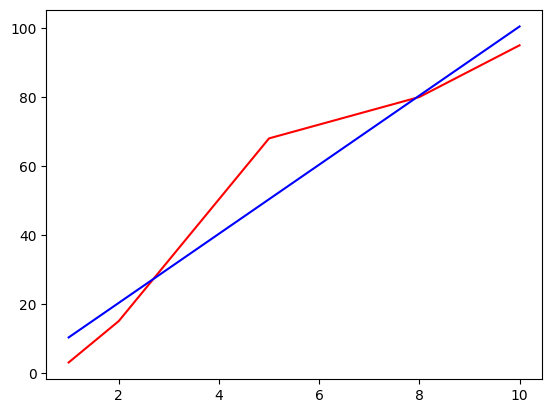

In [28]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict={x:scaled_x_data})
y_hat = scaled_y.inverse_transform(scaled_y_hat)
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'r')
plt.plot(x_data, y_hat, 'b')

## 2.5 입력(독립)변수 x가 3개, 타겟(종속)변수 y가 1개(csv->array)

In [29]:
# 방법 1 : csv -> array
import numpy as np
# data = np.loadtxt('data/ozone.csv', delimiter=',') # 결측치가 없고
data = np.genfromtxt('data/ozone.csv',
                    delimiter=',',
                    skip_header=1,
                    missing_values='NA',
                    filling_values=np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ]])

In [30]:
# 방법 2: csv 파일 -> 데이터 프레인 -> 결측치 처리 -> 넘파이배열 -> 머신러닝 처리
# 1. csv를 데이터프레임으로 읽기
import pandas as pd
data = pd.read_csv('data/ozone.csv', encoding='utf-8')
data.isna().sum() # 열별 결측치 갯수

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [31]:
import pandas as pd
# 결측치 처리 방법 1 : 결측치가 있는 행을 제거
# data.dropna(how='any', axis=0).shape

# 결측치 처리 방법 2 : 결측치 대체(열별 평균값으로 대체)
# data.mean() # 열별평균
# data.fillna(value=data.mean(), inplace=True)

# 결측치 처리 방법 3 : 결측치 대체(월별 열별 평균값으로 대체)
mean_data = data.groupby('Month')[['Ozone','Solar.R']].mean()
display(mean_data)
print('5월에 Ozone으로 대체할 값 :', mean_data.loc[5, 'Ozone'])

,Ozone,Solar.R
Month,,
5,23.615385,181.296296
6,29.444444,190.166667
7,59.115385,216.483871
8,59.961538,171.857143
9,31.448276,167.433333


5월에 Ozone으로 대체할 값 : 23.615384615384617


In [32]:
# 결측치가 있는 데이터
data[data['Ozone'].isna()|data['Solar.R'].isna()]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
9,NaN,194.0,8.6,69,5,10
10,7.0,NaN,6.9,74,5,11
24,NaN,66.0,16.6,57,5,25
25,NaN,266.0,14.9,58,5,26
26,NaN,NaN,8.0,57,5,27
31,NaN,286.0,8.6,78,6,1
32,NaN,287.0,9.7,74,6,2
33,NaN,242.0,16.1,67,6,3


In [33]:
def fill_nan(row):
    # print(row)
    # print(row.isna())
    'row["Ozone"]이나 row["Solar.R"]가 결측치면 mean_data[월, 열이름]으로 대체'
    # if np.isna(row['Ozone']):
    pd.options.mode.copy_on_write = True
    # row = row.copy()
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[int(row.Month), 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[int(row['Month']), 'Solar.R']
    return row
fill_nan(data.loc[4])

Ozone       23.615385
Solar.R    181.296296
Wind        14.300000
Temp        56.000000
Month        5.000000
Day          5.000000
Name: 4, dtype: float64

In [34]:
data = data.apply(fill_nan, axis=1)
X_data = data[['Solar.R', 'Wind', 'Temp']]
y_data = data[['Ozone']].values
X_data.shape, y_data.shape

((153, 3), (153, 1))

In [44]:
# tensorflow 구현
# 1. x, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost 함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W,b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000 == 0:
        print("{}번째 cost{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost499.7618408203125
2000번째 cost481.2039794921875
3000번째 cost471.8970947265625
4000번째 cost467.2274169921875
5000번째 cost464.8822937011719
6000번째 cost463.7022705078125
7000번째 cost463.10626220703125
8000번째 cost462.80303955078125
9000번째 cost462.64654541015625
10000번째 cost462.56378173828125
최종 cost:462.56378173828125, W:[[ 0.05526245]
 [-3.5319674 ]
 [ 0.84895265]], b:[0.14259292]


In [49]:
np.column_stack([X_data, y_data])[:3]

array([[190. ,   7.4,  67. ,  41. ],
       [118. ,   8. ,  72. ,  36. ],
       [149. ,  12.6,  74. ,  12. ]])

In [50]:
# 예측하기
input_data = np.array([[190, 7.4, 67]]) # 41
sess.run(H, feed_dict={X:input_data})

array([[41.38573]], dtype=float32)

### 스케일 조정
```
MinMaxScaler, StanderdScaler
    0~1          -2 ~ 2. 주로 0 근처
```

In [69]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
scaled_x_data = x_scaler.fit_transform(X_data)
scaled_y_data = y_scaler.fit_transform(y_data)
scaler_x_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [71]:
np.column_stack([scaled_x_data, scaled_y_data]).shape

(153, 4)

In [74]:
# tensorflow 구현
# 1. x, y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. 독립변수 3개, 타겟변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random.normal([3, 1]))
b = tf.Variable(tf.random.normal([1]))
# 3. Hypothesis
# H = X@W + b
H = tf.matmul(X, W) + b
# 4. cost 함수(손실함수) : mse
cost = tf.reduce_mean(tf.square(H-y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# sess 객체 생성 & W,b 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 6. 학습
for step in range(1, 30001):
    _, cost_val = sess.run([train, cost], feed_dict={X:scaled_x_data,
                                                    y:scaled_y_data})
    if step%1000 == 0:
        print("{}번째 cost{}".format(step, cost_val))
print("최종 cost:{}, W:{}, b:{}".format(cost_val,
                                     sess.run(W),
                                     sess.run(b)))

1000번째 cost2.04665470123291
2000번째 cost1.908487319946289
3000번째 cost1.7799046039581299
4000번째 cost1.6602275371551514
5000번째 cost1.5488522052764893
6000번째 cost1.4451960325241089
7000번째 cost1.3487244844436646
8000번째 cost1.2589377164840698
9000번째 cost1.1753737926483154
10000번째 cost1.0976052284240723
11000번째 cost1.0252275466918945
12000번째 cost0.9578595161437988
13000번째 cost0.8951687216758728
14000번째 cost0.8368192911148071
15000번째 cost0.7825086712837219
16000번째 cost0.7319694757461548
17000번째 cost0.6849313378334045
18000번째 cost0.6411503553390503
19000번째 cost0.600403904914856
20000번째 cost0.562480628490448
21000번째 cost0.5271816253662109
22000번째 cost0.4943353533744812
23000번째 cost0.46376118063926697
24000번째 cost0.43530362844467163
25000번째 cost0.4088202714920044
26000번째 cost0.38416919112205505
27000번째 cost0.3612283766269684
28000번째 cost0.33987191319465637
29000번째 cost0.3200003504753113
30000번째 cost0.3014989495277405
최종 cost:0.3014989495277405, W:[[-0.06842116]
 [-1.455363  ]
 [-0.551879  ]], b:[

In [75]:
# 예측하기
input_data = np.array([[190, 7.4, 67]])
scaled_y_hat = sess.run(H, feed_dict={X:x_scaler.transform(input_data)})
y_scaler.inverse_transform(scaled_y_hat)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[17.731527]], dtype=float32)

# 3. 이진분류 = logistic Regression (분류분석)
- logistic 회귀분석 : 기존의 회귀분석과 다른 처리 필요시

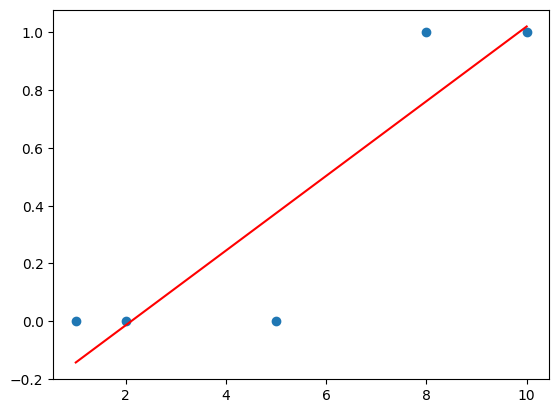

In [79]:
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1]) #실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

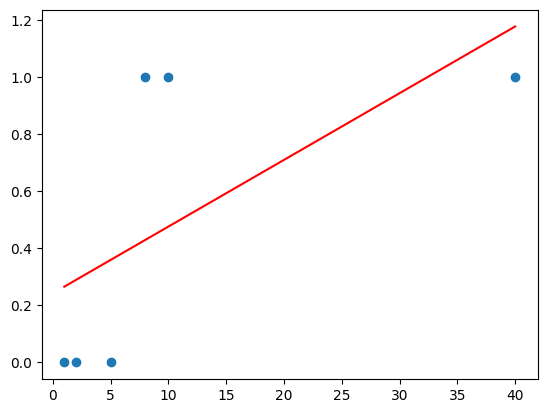

In [80]:
x = np.array([1, 2, 5, 8, 10, 40])
y = np.array([0, 0, 0, 1, 1, 1]) #실제값
from scipy import stats
lm = stats.linregress(x, y) # 기울기(W)와 y절편(b)
H = lm[0]*x + lm[1]
import matplotlib.pyplot as plt
plt.plot(x, H, 'r')
plt.scatter(x, y)

In [93]:
# 교안 50pt
import numpy as np
X_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0],])
# tensorflow 구현(tensor 그래프)
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개의 weight, bias
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
#cost 함수
# cost = tf.reduce_mean(tf.square(H-y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
#train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
# sess객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%800==0:
        print("{}번째 cost:{}".format(step, cost_val))

800번째 cost:0.19962848722934723
1600번째 cost:0.16029317677021027
2400번째 cost:0.13607679307460785
3200번째 cost:0.11833933740854263
4000번째 cost:0.10453418642282486
4800번째 cost:0.09344930201768875
5600번째 cost:0.08436184376478195
6400번째 cost:0.07679153978824615
7200번째 cost:0.07040031999349594
8000번째 cost:0.06494209915399551


In [94]:
# 모델 사용
input_data = np.array([[5, 2]])
predict = tf.cast(H>=0.5, dtype=tf.float32)
sess.run(predict, feed_dict={X:input_data})

array([[1.]], dtype=float32)

In [95]:
# accuracy
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


# 4. XOR

In [96]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 독립변수가 2개, 종속변수가 1개 W, b
W = tf.Variable(tf.random.normal([2, 1]))
b = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(8001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:1.296794056892395
1000번째 cost:0.6959463953971863
2000번째 cost:0.6940104365348816
3000번째 cost:0.6934802532196045
4000번째 cost:0.6932817697525024
5000번째 cost:0.6932035684585571
6000번째 cost:0.6931714415550232
7000번째 cost:0.6931578516960144
8000번째 cost:0.6931519508361816


In [97]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 0.5


# 5. Deep Learning XOR 예제

In [98]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1 : (입력2, 출력4)
W1 = tf.Variable(tf.random.normal([2, 4]))
b1 = tf.Variable(tf.random.normal([4]))
# H
layer1= tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2 : (입력4, 출력1)
W2 = tf.Variable(tf.random.normal([4, 1]))
b2 = tf.Variable(tf.random.normal([1]))
# H
logits = tf.matmul(layer1, W2) + b2
H      = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(10001):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%1000==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:1.9159603118896484
1000번째 cost:0.42743948101997375
2000번째 cost:0.23004427552223206
3000번째 cost:0.12729595601558685
4000번째 cost:0.07370701432228088
5000번째 cost:0.046478163450956345
6000번째 cost:0.03205157071352005
7000번째 cost:0.02392313815653324
8000번째 cost:0.018765736371278763
9000번째 cost:0.015256509184837341
10000번째 cost:0.012747520580887794


In [99]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0


## layer 층 x_data 2개 -> 4 -> 1을
## layer 층 x_data 2개 -> 10 -> 20 -> 10 -> 1

In [104]:
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0], [1], [1], [0]])
# X, y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# layer1(입력층 relu) : 입력 2, 출력 10
W1 = tf.Variable(tf.random.normal([2, 10]))
b1 = tf.Variable(tf.random.normal([10]))
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2(은닉층 relu) : 입력 10, 출력 20
W2 = tf.Variable(tf.random.normal([10, 20]))
b2 = tf.Variable(tf.random.normal([20]))
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3(은닉층 relu) : 입력 20, 출력10
W3 = tf.Variable(tf.random.normal([20, 10]))
b3 = tf.Variable(tf.random.normal([10]))
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4(출력층 이진분류에서는sigmoid, 일반분류에서는 softmax) : 입력 10, 출력1
W4 = tf.Variable(tf.random.normal([10, 1]))
b4 = tf.Variable(tf.random.normal([1]))
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# sess 객체 생성
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(301):
    _, cost_val = sess.run([train, cost], feed_dict={X:X_data,
                                                    y:y_data})
    if step%50==0:
        print("{}번째 cost:{}".format(step, cost_val))

0번째 cost:6.096261978149414
50번째 cost:0.058127161115407944
100번째 cost:0.022259298712015152
150번째 cost:0.014014692977070808
200번째 cost:0.010271023958921432
250번째 cost:0.008063092827796936
300번째 cost:0.0066125839948654175


In [105]:
# accuracy
predict = tf.cast(H>=0.5, dtype=tf.float32)
correct = tf.equal(predict, y)
sess.run(correct, feed_dict={X:X_data,
                            y:y_data})
accuracy = tf.reduce_mean( tf.cast(correct, dtype=tf.float32))
print('모델 정확도 :', sess.run(accuracy, feed_dict={X:X_data,
                                               y:y_data}))

모델 정확도 : 1.0
